In [2]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns


In [5]:
#import dataset

cobify = pd.read_csv('/Users/hollydalton/Labs-Ironhack/technical_challenge_DA/data/measurements.csv')
cobify

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


### First off, looking at this dataset, I'd ask for the metadata which explains the meaning of each feature. 

-It's a bit vague here, would be nice to have descriptions of each feature

#### Each row: data of car's display after each ride; while regularly changing the gas type.

-From kaggle, heading of dataset is: "Which of two fuels is cheaper, E10 or SP 98?"

-I challenge you to predict the consumption depending on the gas type!


### More info from Kaggle

In the file, you will find the displayed distance (km); the consume (L/100km); the average speed (km/h), the temperature I had inside (°C), the temperature outside (°C), anything special that happened, if it was raining, if the air condition was on, if it was sunny enough that the car felt warm when i started it… and the gas type I was using. 

I have also two columns saying how much and which gas type I was buying. Careful with those. The numbers don't add exactly up, because I note only the rides that occur under certain conditions: If the car was not cooling down enough to have another independent measure from the one before, i don't note it.

I started writing down the data in November, changed to SP98 in winter, and back to E10 in spring. Apart from that, the data is rather clean as I was doing my own project on it already.


P98 (sold as "Super plus" sometimes) and SP95 E10 (This is, "super" gas with 10% Alcohol). E10 is sold for 1,38€; SP98 is sold for 1,46€; per liter.

#### Hints that linear regression might not be best tool here

"A large, single-feature-depending difference usually is a hint for lots of covariance between the features; meaning in turn that linear regression might not be the best tool here."

Classification model? Predict the gas type based on other features?

In [6]:
#standardize heading names to snake case
#first, change titles to lower case  (just AC here)
lower = []
for i in cobify.columns:
    lower.append(i.lower())
cobify.columns = lower

cobify

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,ac,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


In [7]:
#Puts underscore instead of spaces
under_ = []
for i in cobify.columns:
    if ' ' in i:
        under_.append(i.replace(' ', '_'))
    else:
        under_.append(i)
cobify.columns = under_   

cobify

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,ac,rain,sun,refill_liters,refill_gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


In [8]:
#converting commas to periods in numerical columns

cobify['distance'] = cobify['distance'].apply(lambda x: x.replace(',', '.')).astype('float')
cobify['consume'] = cobify['consume'].apply(lambda x: x.replace(',', '.')).astype('float')

In [9]:
cobify["temp_inside"] = cobify["temp_inside"].str.replace(',','.').astype('float')


In [10]:
#temp_outside is an integer, change it into a string first
cobify['temp_outside']= cobify['temp_outside'].astype(str) 
cobify["temp_outside"] = cobify["temp_outside"].str.replace(',','.').astype('float')

In [13]:
cobify.dtypes

distance         float64
consume          float64
speed              int64
temp_inside      float64
temp_outside     float64
specials          object
gas_type          object
ac                 int64
rain               int64
sun                int64
refill_liters     object
refill_gas        object
dtype: object

In [14]:
cobify

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,ac,rain,sun,refill_liters,refill_gas
0,28.0,5.0,26,21.5,12.0,NaN,E10,0,0,0,45,E10
1,12.0,4.2,30,21.5,13.0,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15.0,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14.0,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15.0,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18.0,NaN,SP98,0,0,0,NaN,NaN
384,16.1,4.3,38,25.0,31.0,AC,SP98,1,0,0,NaN,NaN
385,16.0,3.8,45,25.0,19.0,NaN,SP98,0,0,0,NaN,NaN
386,15.4,4.6,42,25.0,31.0,AC,SP98,1,0,0,NaN,NaN


In [15]:
#next let's check NaN and unique values and duplicates

In [16]:
cobify.nunique() 

distance         174
consume           43
speed             60
temp_inside       13
temp_outside      33
specials          12
gas_type           2
ac                 2
rain               2
sun                2
refill_liters     10
refill_gas         2
dtype: int64

In [17]:
cobify['consume']. value_counts(dropna=False)

5.0     27
4.5     27
4.6     22
4.7     21
4.3     20
4.1     20
5.1     19
4.8     19
4.4     17
4.0     17
4.9     16
4.2     15
5.3     14
3.9     14
5.2     12
3.8     11
5.7     11
5.6     10
5.4      9
3.7      8
5.8      7
5.5      6
5.9      5
3.6      4
6.4      4
6.1      4
6.2      4
6.0      4
6.3      4
8.1      2
6.5      2
7.4      2
6.9      1
8.7      1
12.2     1
7.9      1
10.8     1
9.9      1
7.1      1
3.3      1
9.0      1
11.5     1
6.6      1
Name: consume, dtype: int64

In [18]:
cobify['speed']. value_counts(dropna=False)

42    18
43    17
38    16
26    15
36    15
33    15
40    15
32    12
44    12
37    12
29    11
39    11
55    11
46    11
45    10
58    10
25    10
24     9
50     9
35     9
57     8
41     8
52     7
53     6
48     6
28     6
30     6
21     6
61     6
51     6
47     5
56     5
22     5
34     4
49     4
27     4
62     4
59     3
60     3
54     3
75     3
23     3
31     3
80     3
69     2
16     2
18     2
71     2
20     2
82     2
63     2
14     1
73     1
66     1
85     1
67     1
88     1
65     1
90     1
87     1
Name: speed, dtype: int64

In [19]:
cobify['temp_inside']. value_counts(dropna=False)

21.5    133
22.0    102
22.5     59
20.0     25
21.0     13
23.0     13
NaN      12
25.0     12
24.5      7
20.5      4
24.0      3
23.5      2
25.5      2
19.0      1
Name: temp_inside, dtype: int64

In [20]:
cobify['temp_outside']. value_counts(dropna=False)

 8.0     31
 10.0    31
 7.0     28
 6.0     21
 9.0     20
 11.0    20
 18.0    19
 12.0    17
 4.0     17
 17.0    16
 16.0    16
 15.0    14
 13.0    14
 14.0    13
 3.0     13
 5.0     13
 1.0     12
 0.0      9
 21.0     9
 2.0      7
 23.0     7
 24.0     7
 19.0     5
 27.0     5
 26.0     4
 31.0     3
 25.0     3
 20.0     3
 30.0     3
 22.0     3
-3.0      2
 28.0     2
-5.0      1
Name: temp_outside, dtype: int64

In [21]:
cobify['specials']. value_counts(dropna=False)   
#this column needs to be cleaned up: lots of NaNs, repeated values

NaN                   295
rain                   32
sun                    27
AC rain                 9
ac                      8
AC                      6
snow                    3
sun ac                  3
AC snow                 1
half rain half sun      1
AC sun                  1
AC Sun                  1
ac rain                 1
Name: specials, dtype: int64

In [22]:
cobify['gas_type']. value_counts(dropna=False)  #only 2 gas types 

SP98    228
E10     160
Name: gas_type, dtype: int64

In [23]:
cobify['ac']. value_counts(dropna=False)   #0 means No A/C used, 1 means yes A/C used, I'm assuming

0    358
1     30
Name: ac, dtype: int64

In [24]:
cobify['rain']. value_counts(dropna=False) #0 means No rain, 1 means yes rain, I'm assuming

0    340
1     48
Name: rain, dtype: int64

In [25]:
cobify['sun']. value_counts(dropna=False) #0 means No sun, 1 means yes sun, I'm assuming

0    356
1     32
Name: sun, dtype: int64

In [26]:
cobify['refill_liters'].value_counts(dropna=False)
#need to fix the commas here! missed it above 
#majority of columns is NaNs

NaN     375
45        2
37,7      2
39        2
37,6      1
38        1
38,3      1
10        1
41        1
37        1
37,2      1
Name: refill_liters, dtype: int64

In [27]:
percent_missing = cobify.isnull().sum() * 100 / len(cobify)
percent_missing

distance          0.000000
consume           0.000000
speed             0.000000
temp_inside       3.092784
temp_outside      0.000000
specials         76.030928
gas_type          0.000000
ac                0.000000
rain              0.000000
sun               0.000000
refill_liters    96.649485
refill_gas       96.649485
dtype: float64

In [28]:
#next steps-- re-read the challenge, see if there's an explanation for these NaNs, otherwise, decide what to do with them

In [29]:
#let's fix NaNs feature by feature, starting with temp_inside
cobify['temp_inside'].value_counts(dropna=False)

21.5    133
22.0    102
22.5     59
20.0     25
21.0     13
23.0     13
NaN      12
25.0     12
24.5      7
20.5      4
24.0      3
23.5      2
25.5      2
19.0      1
Name: temp_inside, dtype: int64

In [35]:
#fill NaNs with mode (21.5)
print(cobify['temp_inside'].median())
print(cobify['temp_inside'].mode())
cobify["temp_inside"].mean()


22.0
0    21.5
Name: temp_inside, dtype: float64


21.929521276595743

In [38]:
cobify['temp_inside'].fillna("21.5", inplace = True)
cobify

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,ac,rain,sun,refill_liters,refill_gas
0,28.0,5.0,26,21.5,12.0,NaN,E10,0,0,0,45,E10
1,12.0,4.2,30,21.5,13.0,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15.0,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14.0,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15.0,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18.0,NaN,SP98,0,0,0,NaN,NaN
384,16.1,4.3,38,25.0,31.0,AC,SP98,1,0,0,NaN,NaN
385,16.0,3.8,45,25.0,19.0,NaN,SP98,0,0,0,NaN,NaN
386,15.4,4.6,42,25.0,31.0,AC,SP98,1,0,0,NaN,NaN


In [43]:
cobify['temp_inside'] = pd.to_numeric(cobify['temp_inside'],errors = 'coerce')
cobify.dtypes

distance         float64
consume          float64
speed              int64
temp_inside      float64
temp_outside     float64
specials          object
gas_type          object
ac                 int64
rain               int64
sun                int64
refill_liters     object
refill_gas        object
dtype: object

In [44]:
cobify['specials']. value_counts(dropna=False)   
#has over 76% NaNs, but first let's put values together that mean the same thing
#NaNs just mean there were no special conditions

NaN                   295
rain                   32
sun                    27
AC rain                 9
ac                      8
AC                      6
snow                    3
sun ac                  3
AC snow                 1
half rain half sun      1
AC sun                  1
AC Sun                  1
ac rain                 1
Name: specials, dtype: int64

In [46]:
cobify['specials'].fillna("No special conditions", inplace = True)
cobify['specials']. value_counts(dropna=False)   

No special conditions    295
rain                      32
sun                       27
AC rain                    9
ac                         8
AC                         6
snow                       3
sun ac                     3
AC snow                    1
half rain half sun         1
AC sun                     1
AC Sun                     1
ac rain                    1
Name: specials, dtype: int64

In [48]:
cobify['specials'] = np.where(cobify['specials'] == 'ac rain', 'AC rain', cobify['specials'])
cobify['specials']. value_counts() 

No special conditions    295
rain                      32
sun                       27
AC rain                   10
ac                         8
AC                         6
snow                       3
sun ac                     3
AC snow                    1
half rain half sun         1
AC sun                     1
AC Sun                     1
Name: specials, dtype: int64

In [49]:
cobify['specials'] = np.where(cobify['specials'] == 'ac', 'AC', cobify['specials'])
cobify['specials']. value_counts() 

No special conditions    295
rain                      32
sun                       27
AC                        14
AC rain                   10
snow                       3
sun ac                     3
AC snow                    1
half rain half sun         1
AC sun                     1
AC Sun                     1
Name: specials, dtype: int64

In [50]:
cobify['specials'] = np.where(cobify['specials'] == 'AC Sun', 'AC sun', cobify['specials'])
cobify['specials']. value_counts() 

No special conditions    295
rain                      32
sun                       27
AC                        14
AC rain                   10
snow                       3
sun ac                     3
AC sun                     2
AC snow                    1
half rain half sun         1
Name: specials, dtype: int64

In [51]:
cobify['specials'] = np.where(cobify['specials'] == 'sun ac', 'AC sun', cobify['specials'])
cobify['specials']. value_counts()   #this is fine for now. no more NaNs, no more repeated values with different labels

No special conditions    295
rain                      32
sun                       27
AC                        14
AC rain                   10
AC sun                     5
snow                       3
AC snow                    1
half rain half sun         1
Name: specials, dtype: int64

In [52]:
percent_missing = cobify.isnull().sum() * 100 / len(cobify)
percent_missing    
#these last 2 features have same amount of NaNs, let's look at the rows that AREN'T Nans and see what they have in common

distance          0.000000
consume           0.000000
speed             0.000000
temp_inside       0.000000
temp_outside      0.000000
specials          0.000000
gas_type          0.000000
ac                0.000000
rain              0.000000
sun               0.000000
refill_liters    96.649485
refill_gas       96.649485
dtype: float64

In [54]:
selected_rows = cobify[~cobify['refill_liters'].isnull()]
selected_rows
#refill liters= how many liters of gas were put into tank
#refill_gas= what kind of gas was put into tank

#so these NaNs are all the rides where gas wasn't put into the tank

#consume is number of liters per 100 kilometers (L/100km)
#distance is in kilometers 
#speed is average km/hour

#what is difference between gas_type column and refill_gas? 
#gas_type is saying, what kind of gas was put into the car in last fill up
#refill_gas is saying, on this particular ride, I put gas in the tank, and this is the kind of gas 

#So out of 388 rides, only filled gas 13 times?

#This is a point where I would return to the client and ask them to clarify the dataframe feature meanings

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,ac,rain,sun,refill_liters,refill_gas
0,28.0,5.0,26,21.5,12.0,No special conditions,E10,0,0,0,45,E10
44,5.4,3.3,32,21.5,7.0,No special conditions,SP98,0,0,0,"37,6",SP98
82,10.5,3.6,42,20.0,10.0,No special conditions,SP98,0,0,0,"37,7",SP98
106,162.7,5.5,75,23.0,1.0,No special conditions,SP98,0,0,0,45,SP98
139,16.1,5.4,24,21.5,7.0,rain,E10,0,1,0,38,E10
171,44.4,4.8,38,21.5,8.0,No special conditions,E10,0,0,0,"38,3",E10
191,43.7,4.7,44,22.0,9.0,half rain half sun,SP98,0,1,0,10,SP98
192,12.1,4.2,43,22.0,4.0,No special conditions,SP98,0,0,0,39,SP98
234,19.0,4.5,29,22.5,10.0,No special conditions,E10,0,0,0,39,E10
274,25.7,4.9,50,22.0,10.0,rain,SP98,0,1,0,41,SP98


In [55]:
#Let's fill NaNs with "No ride refill" for now... 

cobify['refill_liters'].fillna("No ride refill", inplace = True)
cobify['refill_gas'].fillna("No ride refill", inplace = True)


In [57]:
percent_missing = cobify.isnull().sum() * 100 / len(cobify)
percent_missing   #No more NaNs! 

distance         0.0
consume          0.0
speed            0.0
temp_inside      0.0
temp_outside     0.0
specials         0.0
gas_type         0.0
ac               0.0
rain             0.0
sun              0.0
refill_liters    0.0
refill_gas       0.0
dtype: float64

In [58]:
#Let's quickly check for duplicates

cobify.duplicated().sum()
#no duplicate rows

0

In [59]:
cobify

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,ac,rain,sun,refill_liters,refill_gas
0,28.0,5.0,26,21.5,12.0,No special conditions,E10,0,0,0,45,E10
1,12.0,4.2,30,21.5,13.0,No special conditions,E10,0,0,0,No ride refill,No ride refill
2,11.2,5.5,38,21.5,15.0,No special conditions,E10,0,0,0,No ride refill,No ride refill
3,12.9,3.9,36,21.5,14.0,No special conditions,E10,0,0,0,No ride refill,No ride refill
4,18.5,4.5,46,21.5,15.0,No special conditions,E10,0,0,0,No ride refill,No ride refill
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18.0,No special conditions,SP98,0,0,0,No ride refill,No ride refill
384,16.1,4.3,38,25.0,31.0,AC,SP98,1,0,0,No ride refill,No ride refill
385,16.0,3.8,45,25.0,19.0,No special conditions,SP98,0,0,0,No ride refill,No ride refill
386,15.4,4.6,42,25.0,31.0,AC,SP98,1,0,0,No ride refill,No ride refill


In [60]:
cobify.dtypes   #could be problematic later that refill_liters has a string 

distance         float64
consume          float64
speed              int64
temp_inside      float64
temp_outside     float64
specials          object
gas_type          object
ac                 int64
rain               int64
sun                int64
refill_liters     object
refill_gas        object
dtype: object

### Next step: Take a look and find connections between data

<AxesSubplot:xlabel='specials', ylabel='count'>

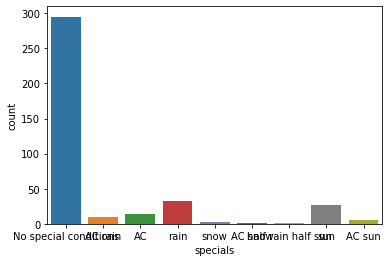

In [61]:
%matplotlib inline
sns.countplot(x=cobify.specials)

<AxesSubplot:xlabel='gas_type', ylabel='count'>

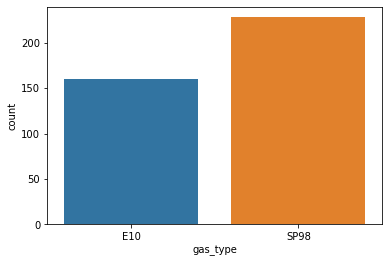

In [62]:
%matplotlib inline
sns.countplot(x=cobify.gas_type)   #can see used SP98 more than E10

<AxesSubplot:xlabel='refill_gas', ylabel='count'>

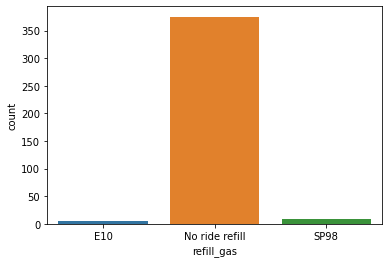

In [63]:
%matplotlib inline
sns.countplot(x=cobify.refill_gas)

<AxesSubplot:xlabel='refill_liters', ylabel='count'>

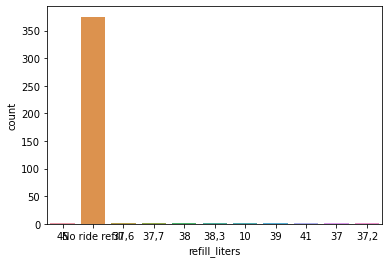

In [64]:
sns.countplot(x=cobify.refill_liters)